##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE180661**

This dataset contains 158 samples from 41 pre-treatment OC patients
Sites: 
* adnexa (ovary and fallopian tube) - primary
* omentum
* peritoneum
* bowel
* ascites
* other intra-peritonel sites

Kelvin downloaded data for me (rds objects), due to the size likely too large to merge. May need to export myeloid cells first and then merge

The data kelvin downloaded is one rds (seurat) object per patient (this includes multiple matched sites per patient)




In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE180661')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE180661"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
P002 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-002.rds")
P003 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-003.rds")
P007 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-007.rds")
P008 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-008.rds")
P009 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-009.rds")
P014 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-014.rds")
P022 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-022.rds")
P024 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-024.rds")
P025 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-025.rds")
P026 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-026.rds")
P031 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-031.rds")
P036 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-036.rds")
P037 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-037.rds")
P041 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-041.rds")
P042 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-042.rds")
P045 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-045.rds")
P049 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-049.rds")
P050 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-050.rds")
P051 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-051.rds")
P052 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-052.rds")
P053 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-053.rds")
P054 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-054.rds")
P065 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-065.rds")
P067 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-067.rds")
P068 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-068.rds")
P070 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-070.rds")
P071 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-071.rds")
P075 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-075.rds")
P077 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-077.rds")
P080 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-080.rds")
P081 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-081.rds")
P082 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-082.rds")
P083 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-083.rds")
P090 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-090.rds")
P105 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-105.rds")
P107 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-107.rds")
P110 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-110.rds")
P112 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-112.rds")
P115 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-115.rds")
P116 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-116.rds")
P118 <- readRDS(file = "/scratch/user/s4436039/scdata/GSE180661/SPECTRUM-OV-118.rds")

In [4]:
head(P002@meta.data)
tail(P002@meta.data)

sample                                     
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
                                                             cell_type
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC T.cell   
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT T.cell   
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA T.cell   
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG T.cell   
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG T.cell   
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT T.cell   
                                                             percent.mt
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC  6.528371 
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT  7.581297 
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA  7.552810 
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG  7.004060 
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG  9.461397 
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 12.360910 
                                                             nCount_RNA
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 8195      
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 5197      
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 5018      
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 6896      
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 4883      
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 4134      
                                                             nFeature_RNA
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 2691        
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 1791        
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 1727        
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 2263        
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 1798        
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 1325        
                                                             umap50_1  
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC  -8.679758
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT -10.031369
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA  -9.832402
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG  -9.703304
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG  -7.801433
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT  -8.263696
                                                             umap50_2
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 6.763180
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 5.792929
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 7.440627
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 4.135003
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 6.679767
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 8.116325
                                                             cluster_label  
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC CD8.T.cytotoxic
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT CD8.T.ISG      
SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA CD4.T.naive    
S

sample                              
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY
                                                      cell_type    percent.mt
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA T.cell       10.674886 
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA T.cell        7.854985 
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT T.cell        8.684965 
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT Myeloid.cell  5.025006 
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG T.cell        7.265210 
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA B.cell        8.199913 
                                                      nCount_RNA nFeature_RNA
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA  6164      2391        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA  7282      2461        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT  4882      1560        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT 20995      3788        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG  8465      3050        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA  4622      1720        
                                                      umap50_1   umap50_2 
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA -11.127443  2.245321
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA  -6.028986  3.109145
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT  -6.491462  2.758544
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT  -2.397530 -9.490385
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG  -5.097231  8.715179
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA  -3.110920 15.263931
                                                      cluster_label
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA CD4.T.reg    
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA CD8.T.ISG    
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT NA           
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT NA           
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG CD4.Th17     
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA B.Mature     
                                                      cluster_label_sub
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA CD4.T.reg.2      
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA CD8.T.dysfunc.ISG
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT NA               
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT NA               
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG CD4.Th17.3       
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA NA               
                                                      cell_type_super
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA T.super        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA T.super        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT T.super        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATGGCT Myeloid.super  
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTAGTCAG T.super        
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGTCTCTCTAA B.super        
                                                      patient_id     
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCCACTTTA SPECTRUM-OV-002
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGGTTTCGGATAAA SPECTRUM-OV-002
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGAGTCTAGCT SPECTRUM-OV-002
SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY_TTTGTTGCATATG

In [5]:
table(P002$tumor_site)
table(P002$tumor_subsite)
table(P002$tumor_supersite)


     Omentum Right Adnexa 
        2763         4950 


Infracolic Omentum        Right Ovary 
              2763               4950 


 Adnexa Omentum 
   4950    2763 

In [6]:
table(P116$tumor_site)
table(P116$tumor_subsite)
table(P116$tumor_supersite)


     Ascites      Omentum        Other Right Adnexa 
        7212         8022         8012         5948 


               Ascites     Infracolic Omentum           Right Adnexa 
                  7212                   8022                   5948 
Right Paracolic Gutter 
                  8012 


 Adnexa Ascites Omentum   Other 
   5948    7212    8022    8012 

From above tumor_supersite is what I'll use to distinguish sites --> set sample_type to this to match convention with other datasets. Note anything that says adnexa can be considered primary and everything else is mets

All samples are HGSOC so can set cancer_type to that

sample_id needs to be unique to each sample, set to what is currently sample

patient_id is already there

add GSE180661_HGSOC to start of all barcodes

In [7]:
P002@meta.data$sample_type <- P002@meta.data$tumor_supersite
P002@meta.data$cancer_type <- "HGSOC"
P002@meta.data$sample_id <- P002@meta.data$sample
colnames(P002) <- paste0("GSE180661_HGSOC_", colnames(P002))

In [8]:
P003@meta.data$sample_type <- P003@meta.data$tumor_supersite
P003@meta.data$cancer_type <- "HGSOC"
P003@meta.data$sample_id <- P003@meta.data$sample
colnames(P003) <- paste0("GSE180661_HGSOC_", colnames(P003))

In [9]:
P007@meta.data$sample_type <- P007@meta.data$tumor_supersite
P007@meta.data$cancer_type <- "HGSOC"
P007@meta.data$sample_id <- P007@meta.data$sample
colnames(P007) <- paste0("GSE180661_HGSOC_", colnames(P007))

In [10]:
P008@meta.data$sample_type <- P008@meta.data$tumor_supersite
P008@meta.data$cancer_type <- "HGSOC"
P008@meta.data$sample_id <- P008@meta.data$sample
colnames(P008) <- paste0("GSE180661_HGSOC_", colnames(P008))

In [11]:
P009@meta.data$sample_type <- P009@meta.data$tumor_supersite
P009@meta.data$cancer_type <- "HGSOC"
P009@meta.data$sample_id <- P009@meta.data$sample
colnames(P009) <- paste0("GSE180661_HGSOC_", colnames(P009))

In [12]:
P014@meta.data$sample_type <- P014@meta.data$tumor_supersite
P014@meta.data$cancer_type <- "HGSOC"
P014@meta.data$sample_id <- P014@meta.data$sample
colnames(P014) <- paste0("GSE180661_HGSOC_", colnames(P014))

In [13]:
P022@meta.data$sample_type <- P022@meta.data$tumor_supersite
P022@meta.data$cancer_type <- "HGSOC"
P022@meta.data$sample_id <- P022@meta.data$sample
colnames(P022) <- paste0("GSE180661_HGSOC_", colnames(P022))

In [14]:
P024@meta.data$sample_type <- P024@meta.data$tumor_supersite
P024@meta.data$cancer_type <- "HGSOC"
P024@meta.data$sample_id <- P024@meta.data$sample
colnames(P024) <- paste0("GSE180661_HGSOC_", colnames(P024))

In [15]:
P025@meta.data$sample_type <- P025@meta.data$tumor_supersite
P025@meta.data$cancer_type <- "HGSOC"
P025@meta.data$sample_id <- P025@meta.data$sample
colnames(P025) <- paste0("GSE180661_HGSOC_", colnames(P025))

In [16]:
P026@meta.data$sample_type <- P026@meta.data$tumor_supersite
P026@meta.data$cancer_type <- "HGSOC"
P026@meta.data$sample_id <- P026@meta.data$sample
colnames(P026) <- paste0("GSE180661_HGSOC_", colnames(P026))

In [17]:
P031@meta.data$sample_type <- P031@meta.data$tumor_supersite
P031@meta.data$cancer_type <- "HGSOC"
P031@meta.data$sample_id <- P031@meta.data$sample
colnames(P031) <- paste0("GSE180661_HGSOC_", colnames(P031))

In [18]:
P036@meta.data$sample_type <- P036@meta.data$tumor_supersite
P036@meta.data$cancer_type <- "HGSOC"
P036@meta.data$sample_id <- P036@meta.data$sample
colnames(P036) <- paste0("GSE180661_HGSOC_", colnames(P036))

In [19]:
P037@meta.data$sample_type <- P037@meta.data$tumor_supersite
P037@meta.data$cancer_type <- "HGSOC"
P037@meta.data$sample_id <- P037@meta.data$sample
colnames(P037) <- paste0("GSE180661_HGSOC_", colnames(P037))

In [20]:
P041@meta.data$sample_type <- P041@meta.data$tumor_supersite
P041@meta.data$cancer_type <- "HGSOC"
P041@meta.data$sample_id <- P041@meta.data$sample
colnames(P041) <- paste0("GSE180661_HGSOC_", colnames(P041))

In [21]:
P042@meta.data$sample_type <- P042@meta.data$tumor_supersite
P042@meta.data$cancer_type <- "HGSOC"
P042@meta.data$sample_id <- P042@meta.data$sample
colnames(P042) <- paste0("GSE180661_HGSOC_", colnames(P042))

In [22]:
P045@meta.data$sample_type <- P045@meta.data$tumor_supersite
P045@meta.data$cancer_type <- "HGSOC"
P045@meta.data$sample_id <- P045@meta.data$sample
colnames(P045) <- paste0("GSE180661_HGSOC_", colnames(P045))

In [23]:
P049@meta.data$sample_type <- P049@meta.data$tumor_supersite
P049@meta.data$cancer_type <- "HGSOC"
P049@meta.data$sample_id <- P049@meta.data$sample
colnames(P049) <- paste0("GSE180661_HGSOC_", colnames(P049))

In [24]:
P050@meta.data$sample_type <- P050@meta.data$tumor_supersite
P050@meta.data$cancer_type <- "HGSOC"
P050@meta.data$sample_id <- P050@meta.data$sample
colnames(P050) <- paste0("GSE180661_HGSOC_", colnames(P050))

In [25]:
P051@meta.data$sample_type <- P051@meta.data$tumor_supersite
P051@meta.data$cancer_type <- "HGSOC"
P051@meta.data$sample_id <- P051@meta.data$sample
colnames(P051) <- paste0("GSE180661_HGSOC_", colnames(P051))

In [26]:
P052@meta.data$sample_type <- P052@meta.data$tumor_supersite
P052@meta.data$cancer_type <- "HGSOC"
P052@meta.data$sample_id <- P052@meta.data$sample
colnames(P052) <- paste0("GSE180661_HGSOC_", colnames(P052))

In [27]:
P053@meta.data$sample_type <- P053@meta.data$tumor_supersite
P053@meta.data$cancer_type <- "HGSOC"
P053@meta.data$sample_id <- P053@meta.data$sample
colnames(P053) <- paste0("GSE180661_HGSOC_", colnames(P053))

In [28]:
P054@meta.data$sample_type <- P054@meta.data$tumor_supersite
P054@meta.data$cancer_type <- "HGSOC"
P054@meta.data$sample_id <- P054@meta.data$sample
colnames(P054) <- paste0("GSE180661_HGSOC_", colnames(P054))

In [29]:
P065@meta.data$sample_type <- P065@meta.data$tumor_supersite
P065@meta.data$cancer_type <- "HGSOC"
P065@meta.data$sample_id <- P065@meta.data$sample
colnames(P065) <- paste0("GSE180661_HGSOC_", colnames(P065))

In [30]:
P067@meta.data$sample_type <- P067@meta.data$tumor_supersite
P067@meta.data$cancer_type <- "HGSOC"
P067@meta.data$sample_id <- P067@meta.data$sample
colnames(P067) <- paste0("GSE180661_HGSOC_", colnames(P067))

In [31]:
P068@meta.data$sample_type <- P068@meta.data$tumor_supersite
P068@meta.data$cancer_type <- "HGSOC"
P068@meta.data$sample_id <- P068@meta.data$sample
colnames(P068) <- paste0("GSE180661_HGSOC_", colnames(P068))

In [32]:
P070@meta.data$sample_type <- P070@meta.data$tumor_supersite
P070@meta.data$cancer_type <- "HGSOC"
P070@meta.data$sample_id <- P070@meta.data$sample
colnames(P070) <- paste0("GSE180661_HGSOC_", colnames(P070))

In [33]:
P071@meta.data$sample_type <- P071@meta.data$tumor_supersite
P071@meta.data$cancer_type <- "HGSOC"
P071@meta.data$sample_id <- P071@meta.data$sample
colnames(P071) <- paste0("GSE180661_HGSOC_", colnames(P071))

In [34]:
P075@meta.data$sample_type <- P075@meta.data$tumor_supersite
P075@meta.data$cancer_type <- "HGSOC"
P075@meta.data$sample_id <- P075@meta.data$sample
colnames(P075) <- paste0("GSE180661_HGSOC_", colnames(P075))

In [35]:
P077@meta.data$sample_type <- P077@meta.data$tumor_supersite
P077@meta.data$cancer_type <- "HGSOC"
P077@meta.data$sample_id <- P077@meta.data$sample
colnames(P077) <- paste0("GSE180661_HGSOC_", colnames(P077))

In [36]:
P080@meta.data$sample_type <- P080@meta.data$tumor_supersite
P080@meta.data$cancer_type <- "HGSOC"
P080@meta.data$sample_id <- P080@meta.data$sample
colnames(P080) <- paste0("GSE180661_HGSOC_", colnames(P080))

In [37]:
P081@meta.data$sample_type <- P081@meta.data$tumor_supersite
P081@meta.data$cancer_type <- "HGSOC"
P081@meta.data$sample_id <- P081@meta.data$sample
colnames(P081) <- paste0("GSE180661_HGSOC_", colnames(P081))

In [38]:
P082@meta.data$sample_type <- P082@meta.data$tumor_supersite
P082@meta.data$cancer_type <- "HGSOC"
P082@meta.data$sample_id <- P082@meta.data$sample
colnames(P082) <- paste0("GSE180661_HGSOC_", colnames(P082))

In [39]:
P083@meta.data$sample_type <- P083@meta.data$tumor_supersite
P083@meta.data$cancer_type <- "HGSOC"
P083@meta.data$sample_id <- P083@meta.data$sample
colnames(P083) <- paste0("GSE180661_HGSOC_", colnames(P083))

In [40]:
P090@meta.data$sample_type <- P090@meta.data$tumor_supersite
P090@meta.data$cancer_type <- "HGSOC"
P090@meta.data$sample_id <- P090@meta.data$sample
colnames(P090) <- paste0("GSE180661_HGSOC_", colnames(P090))

In [41]:
P105@meta.data$sample_type <- P105@meta.data$tumor_supersite
P105@meta.data$cancer_type <- "HGSOC"
P105@meta.data$sample_id <- P105@meta.data$sample
colnames(P105) <- paste0("GSE180661_HGSOC_", colnames(P105))

In [42]:
P107@meta.data$sample_type <- P107@meta.data$tumor_supersite
P107@meta.data$cancer_type <- "HGSOC"
P107@meta.data$sample_id <- P107@meta.data$sample
colnames(P107) <- paste0("GSE180661_HGSOC_", colnames(P107))

In [43]:
P110@meta.data$sample_type <- P110@meta.data$tumor_supersite
P110@meta.data$cancer_type <- "HGSOC"
P110@meta.data$sample_id <- P110@meta.data$sample
colnames(P110) <- paste0("GSE180661_HGSOC_", colnames(P110))

In [44]:
P112@meta.data$sample_type <- P112@meta.data$tumor_supersite
P112@meta.data$cancer_type <- "HGSOC"
P112@meta.data$sample_id <- P112@meta.data$sample
colnames(P112) <- paste0("GSE180661_HGSOC_", colnames(P112))

In [45]:
P115@meta.data$sample_type <- P115@meta.data$tumor_supersite
P115@meta.data$cancer_type <- "HGSOC"
P115@meta.data$sample_id <- P115@meta.data$sample
colnames(P115) <- paste0("GSE180661_HGSOC_", colnames(P115))

In [46]:
P116@meta.data$sample_type <- P116@meta.data$tumor_supersite
P116@meta.data$cancer_type <- "HGSOC"
P116@meta.data$sample_id <- P116@meta.data$sample
colnames(P116) <- paste0("GSE180661_HGSOC_", colnames(P116))

In [47]:
P118@meta.data$sample_type <- P118@meta.data$tumor_supersite
P118@meta.data$cancer_type <- "HGSOC"
P118@meta.data$sample_id <- P118@meta.data$sample
colnames(P118) <- paste0("GSE180661_HGSOC_", colnames(P118))

In [48]:
head(P002@meta.data)
head(P053@meta.data)
head(P118@meta.data)

sample                                     
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
                                                                             cell_type
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT T.cell   
                                                                             percent.mt
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC  6.528371 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT  7.581297 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA  7.552810 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG  7.004060 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG  9.461397 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 12.360910 
                                                                             nCount_RNA
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 8196      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 5198      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 5018      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 6898      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 4883      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 4134      
                                                                             nFeature_RNA
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 2692        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 1792        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 1727        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 2265        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 1798        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 1325        
                                                                             umap50_1  
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC  -8.679758
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT -10.031369
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA  -9.832402
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG  -9.703304
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG  -7.801433
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT  -8.263696
                                                                             umap50_2
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENT

sample                              
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCGAGCC SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGCTGTGGCTGCT SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY
                                                                      cell_type   
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT T.cell      
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC Myeloid.cell
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT T.cell      
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA T.cell      
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCGAGCC T.cell      
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGCTGTGGCTGCT Myeloid.cell
                                                                      percent.mt
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT  4.693822 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC  5.953402 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT 10.303588 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA  8.604493 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCGAGCC 19.983065 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGCTGTGGCTGCT  9.354031 
                                                                      nCount_RNA
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT  3708     
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC 15162     
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT  1088     
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA  7349     
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCGAGCC  1182     
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGCTGTGGCTGCT  9990     
                                                                      nFeature_RNA
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT 1546        
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC 3216        
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT  668        
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA 2577        
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCGAGCC  649        
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGCTGTGGCTGCT 2838        
                                                                      umap50_1 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT -2.605502
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC -6.854005
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT -3.272601
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA -6.848178
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCGAGCC -7.515255
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGCTGTGGCTGCT -2.637949
                                                                      umap50_2 
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACAAATGGAT  5.378567
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACCCACACTGCTTC -8.453485
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAAGTCACTGT  5.871026
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAACAAAGGAGA -0.440724
GSE180661_HGSOC_SPECTRUM-OV-053_S1_CD45P_RIGHT_OVARY_AAACGAAGTTCG

sample                               
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACATGCAGGA SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAGTGCATTTG SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA
                                                                       cell_type   
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC T.cell      
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT Myeloid.cell
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC Myeloid.cell
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA Myeloid.cell
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACATGCAGGA Myeloid.cell
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAGTGCATTTG T.cell      
                                                                       percent.mt
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC 18.328446 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT  5.464882 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC  8.102051 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA  6.780402 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACATGCAGGA  1.293413 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAGTGCATTTG  5.035080 
                                                                       nCount_RNA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC  1364     
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT  5453     
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC 11603     
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA 18288     
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACATGCAGGA 16702     
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAGTGCATTTG  2423     
                                                                       nFeature_RNA
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC  667        
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT 1931        
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC 3180        
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA 4347        
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACATGCAGGA 3577        
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAGTGCATTTG 1041        
                                                                       umap50_1 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC -7.580672
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT -2.047328
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC -7.027961
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA -6.217281
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACATGCAGGA -2.144563
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAGTGCATTTG -7.059584
                                                                       umap50_2 
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGGCATTTC  5.477869
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCAAGTCCCGGT -9.396555
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGATACTC -6.241345
GSE180661_HGSOC_SPECTRUM-OV-118_S1_CD45P_RIGHT_ADNEXA_AAACCCACAGTTGTCA -7.200361
GSE180661_HG

Too many samples to merge at once, instead going to merge into 5 groups, perform clustering/extraction, and then will merge myeloid cells at the end. 

In [49]:
#Merge seurat objects
OC1 <- merge(P002, y = c(P003, P007, P008, P009, P014, P022, P024, P025), project = "GSE180661")

In [50]:
OC2 <- merge(P026, y = c(P031, P036, P037, P041, P042, P045, P049, P050), project = "GSE180661")

In [51]:
OC3 <- merge(P051, y = c(P052, P053, P054, P065, P067, P068, P070, P071), project = "GSE180661")

In [52]:
OC4 <- merge(P075, y = c(P077, P080, P081, P082, P083, P090, P105, P107), project = "GSE180661")

In [53]:
OC5 <- merge(P110, y = c(P112, P115, P116, P118), project = "GSE180661")

In [54]:
OC1
head(OC1@meta.data)
tail(OC1@meta.data)

OC2
OC3
OC4
OC5

An object of class Seurat 
32223 features across 234576 samples within 1 assay 
Active assay: RNA (32223 features, 0 variable features)
 2 layers present: counts, data

sample                                     
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM
                                                                             cell_type
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG T.cell   
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT T.cell   
                                                                             percent.mt
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC  6.528371 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT  7.581297 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA  7.552810 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG  7.004060 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG  9.461397 
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 12.360910 
                                                                             nCount_RNA
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 8196      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 5198      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 5018      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 6898      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 4883      
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 4134      
                                                                             nFeature_RNA
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC 2692        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT 1792        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA 1727        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG 2265        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG 1798        
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT 1325        
                                                                             umap50_1  
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAAGTCTAACC  -8.679758
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCACAAACTCGT -10.031369
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACCCAGTGAATTGA  -9.832402
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAAGGACACTG  -9.703304
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAACATCTCAAG  -7.801433
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENTUM_AAACGAAGTATGAAGT  -8.263696
                                                                             umap50_2
GSE180661_HGSOC_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_OMENT

sample                        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG SPECTRUM-OV-025_S1_CD45N_BOWEL
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG SPECTRUM-OV-025_S1_CD45N_BOWEL
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA SPECTRUM-OV-025_S1_CD45N_BOWEL
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT SPECTRUM-OV-025_S1_CD45N_BOWEL
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG SPECTRUM-OV-025_S1_CD45N_BOWEL
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT SPECTRUM-OV-025_S1_CD45N_BOWEL
                                                                cell_type          
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG Fibroblast         
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG Fibroblast         
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA Fibroblast         
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT Fibroblast         
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG Fibroblast         
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT Ovarian.cancer.cell
                                                                percent.mt
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG  3.935622 
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG  9.415584 
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA 16.347518 
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT 10.584409 
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG  5.751288 
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT  8.408578 
                                                                nCount_RNA
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG  7954     
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG 11397     
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA  2820     
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT 10149     
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG  7182     
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT 19495     
                                                                nFeature_RNA
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG 2520        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG 3025        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA  617        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT 2859        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG 2445        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT 4626        
                                                                umap50_1
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG 7.101725
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG 9.560030
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA 7.934611
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT 7.161368
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG 8.427120
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT 5.455308
                                                                umap50_2  
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG -10.027970
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGTTGACG  -8.665148
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGCAACAAGTA  -8.276910
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGGTCCGGACT  -9.299757
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCCCATAAG  -8.420053
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGTCTGCGGGT   1.897493
                                                                cluster_label        
GSE180661_HGSOC_SPECTRUM-OV-025_S1_CD45N_BOWEL_TTTGTTGAGGAGGGTG Activated.CAF.TGFb   
GSE180661_HGSO

An object of class Seurat 
32223 features across 195457 samples within 1 assay 
Active assay: RNA (32223 features, 0 variable features)
 2 layers present: counts, data

An object of class Seurat 
32223 features across 163829 samples within 1 assay 
Active assay: RNA (32223 features, 0 variable features)
 2 layers present: counts, data

An object of class Seurat 
32223 features across 203372 samples within 1 assay 
Active assay: RNA (32223 features, 0 variable features)
 2 layers present: counts, data

An object of class Seurat 
32223 features across 132456 samples within 1 assay 
Active assay: RNA (32223 features, 0 variable features)
 2 layers present: counts, data

Now subsetting to only CD45+ cells

In [55]:
table(OC1$sort_parameters)
table(OC2$sort_parameters)
table(OC3$sort_parameters)
table(OC4$sort_parameters)
table(OC5$sort_parameters)


singlet, live, CD45- singlet, live, CD45+     singlet, live, U 
               84816               123421                26339 


singlet, live, CD45- singlet, live, CD45+ 
               76700               118757 


singlet, live, CD45- singlet, live, CD45+ 
               90732                73097 


singlet, live, CD45- singlet, live, CD45+ 
              106166                97206 


singlet, live, CD45- singlet, live, CD45+ 
               64293                68163 

In [56]:
#don't want CD45 neg
OC1.45 <- subset(OC1, subset = sort_parameters %in% c("singlet, live, CD45+","singlet, live, U"))
OC2.45 <- subset(OC2, subset = sort_parameters %in% c("singlet, live, CD45+"))
OC3.45 <- subset(OC3, subset = sort_parameters %in% c("singlet, live, CD45+"))
OC4.45 <- subset(OC4, subset = sort_parameters %in% c("singlet, live, CD45+"))
OC5.45 <- subset(OC5, subset = sort_parameters %in% c("singlet, live, CD45+"))

In [57]:
table(OC1.45$sort_parameters)
table(OC2.45$sort_parameters)
table(OC3.45$sort_parameters)
table(OC4.45$sort_parameters)
table(OC5.45$sort_parameters)


singlet, live, CD45+     singlet, live, U 
              123421                26339 


singlet, live, CD45+ 
              118757 


singlet, live, CD45+ 
               73097 


singlet, live, CD45+ 
               97206 


singlet, live, CD45+ 
               68163 

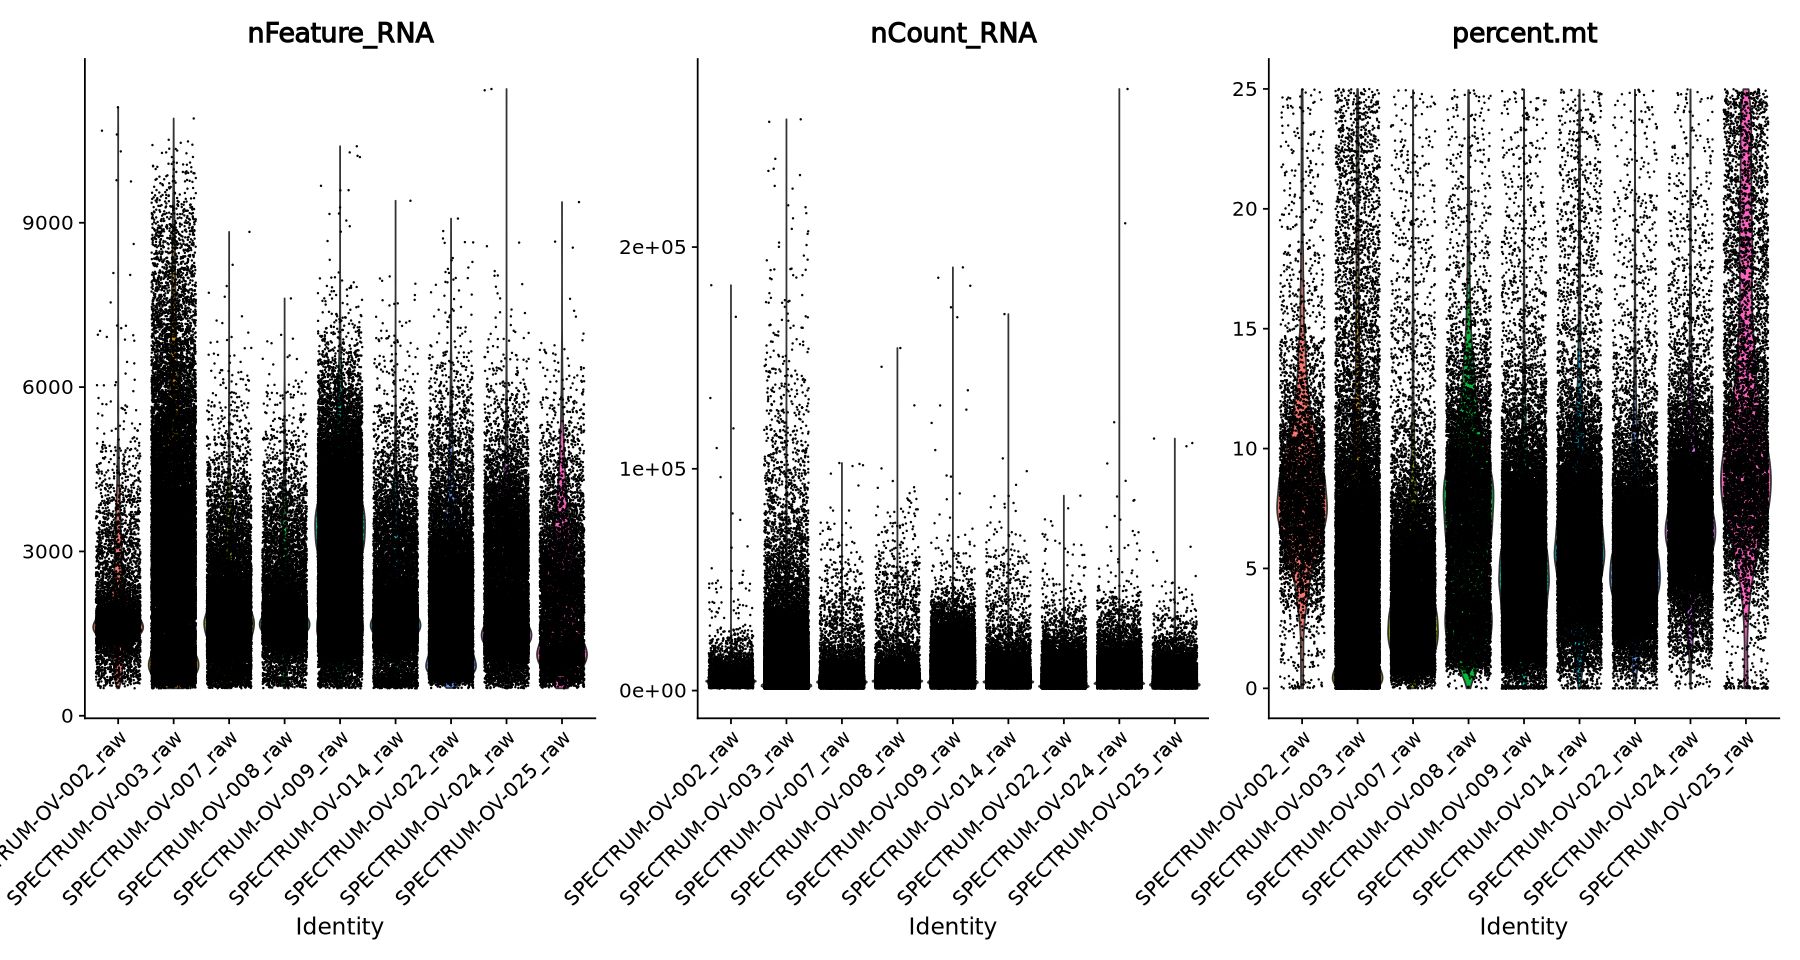

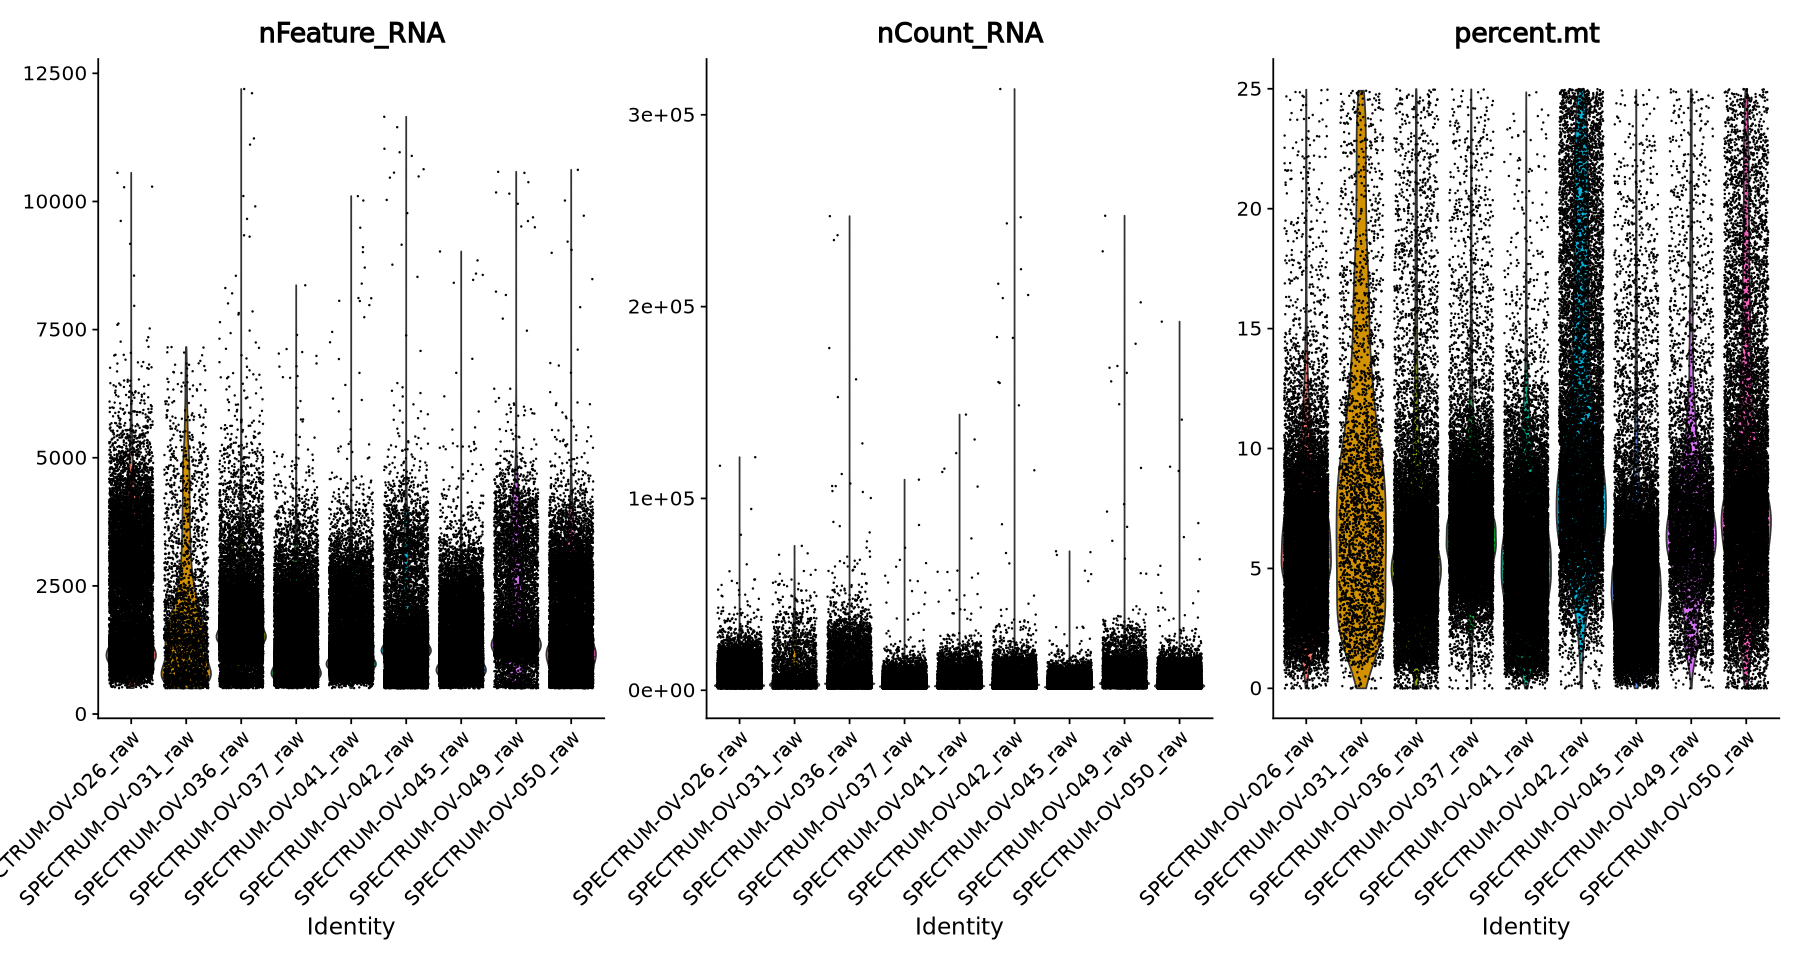

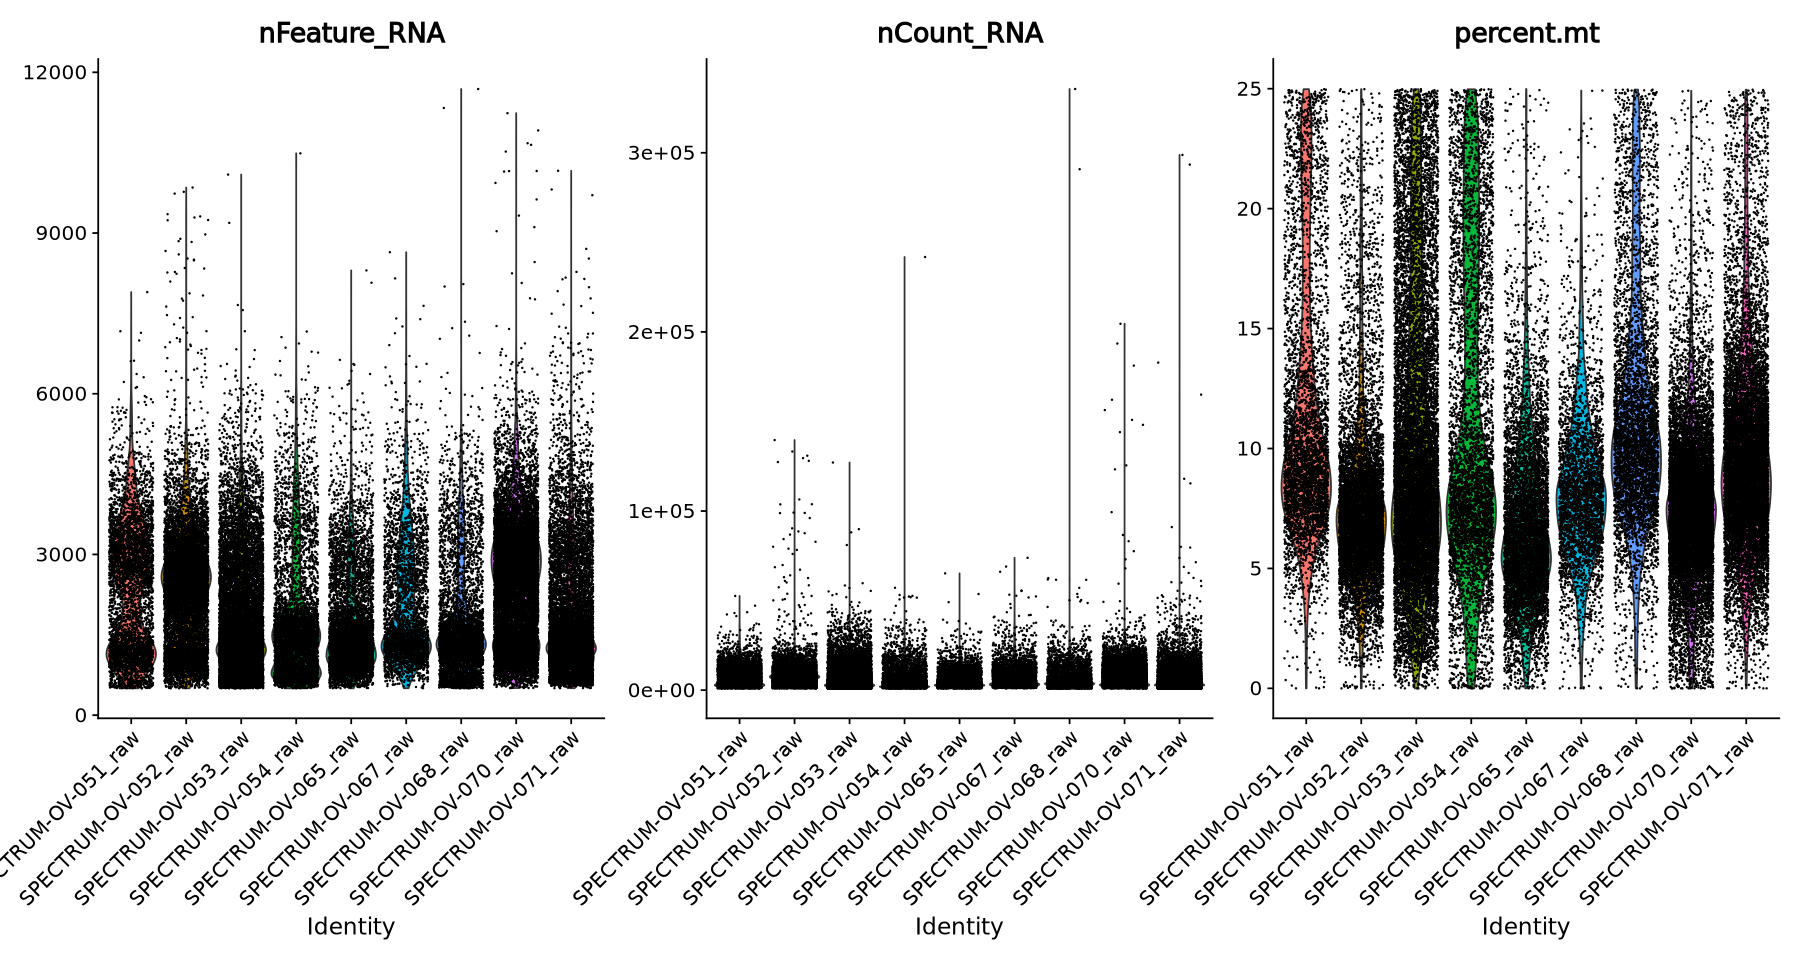

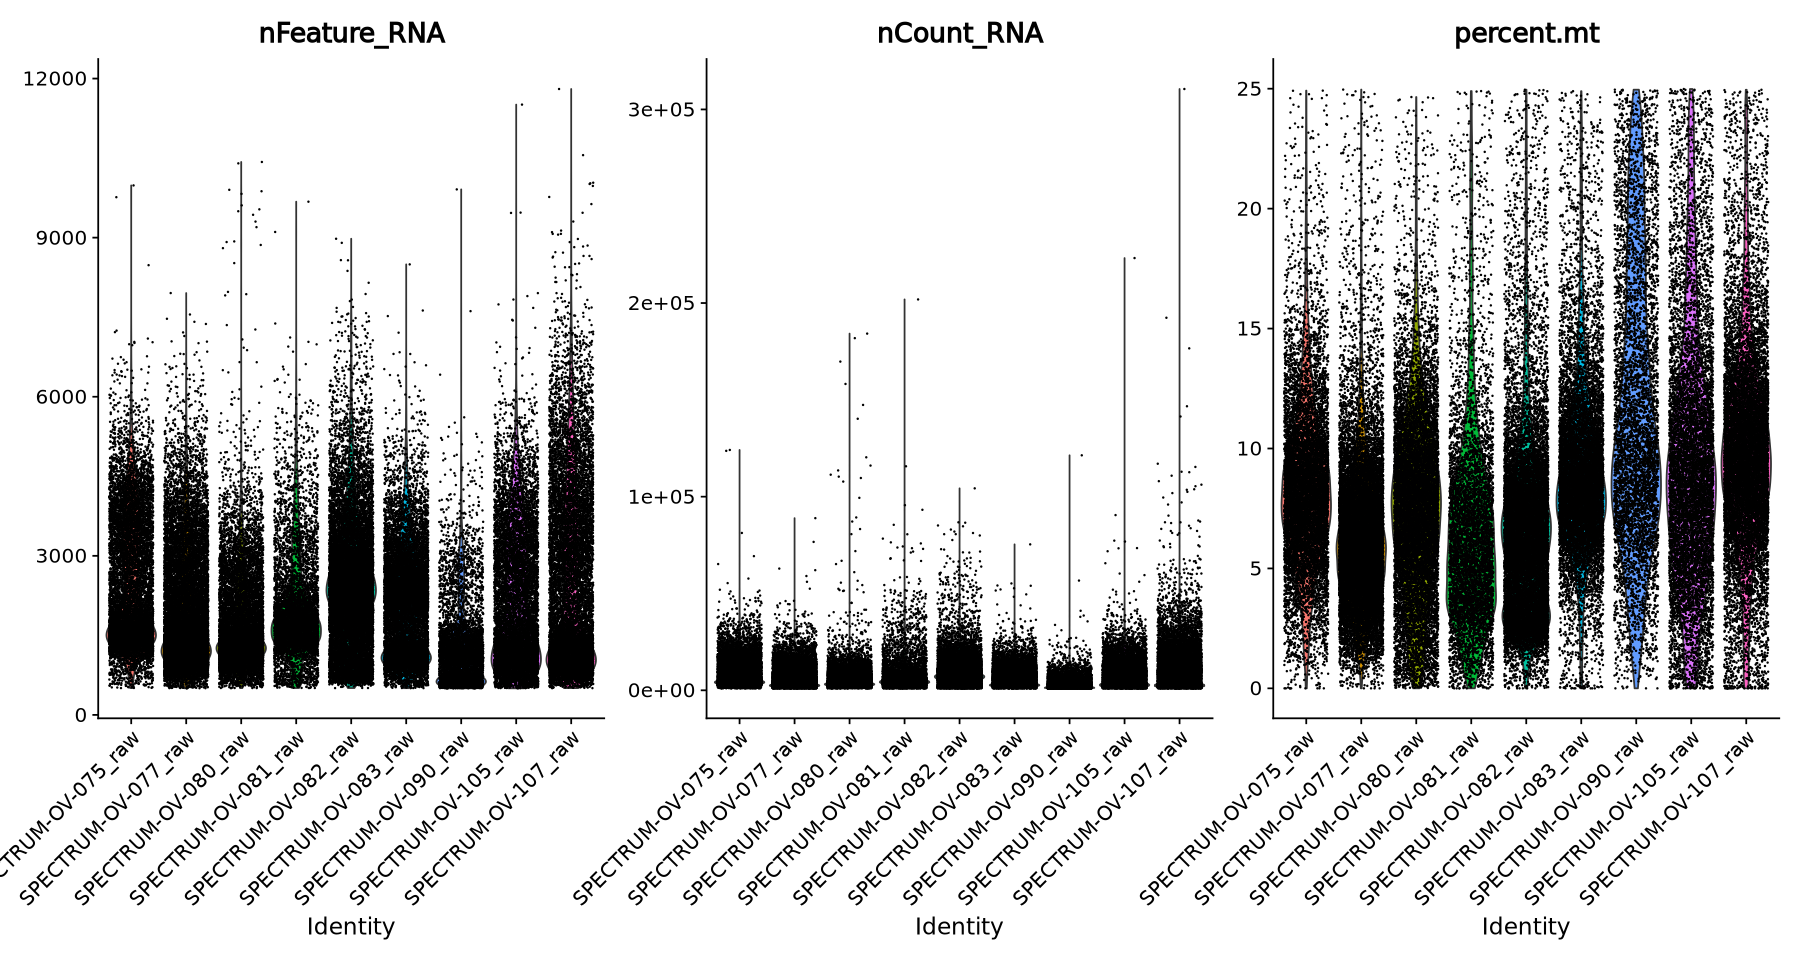

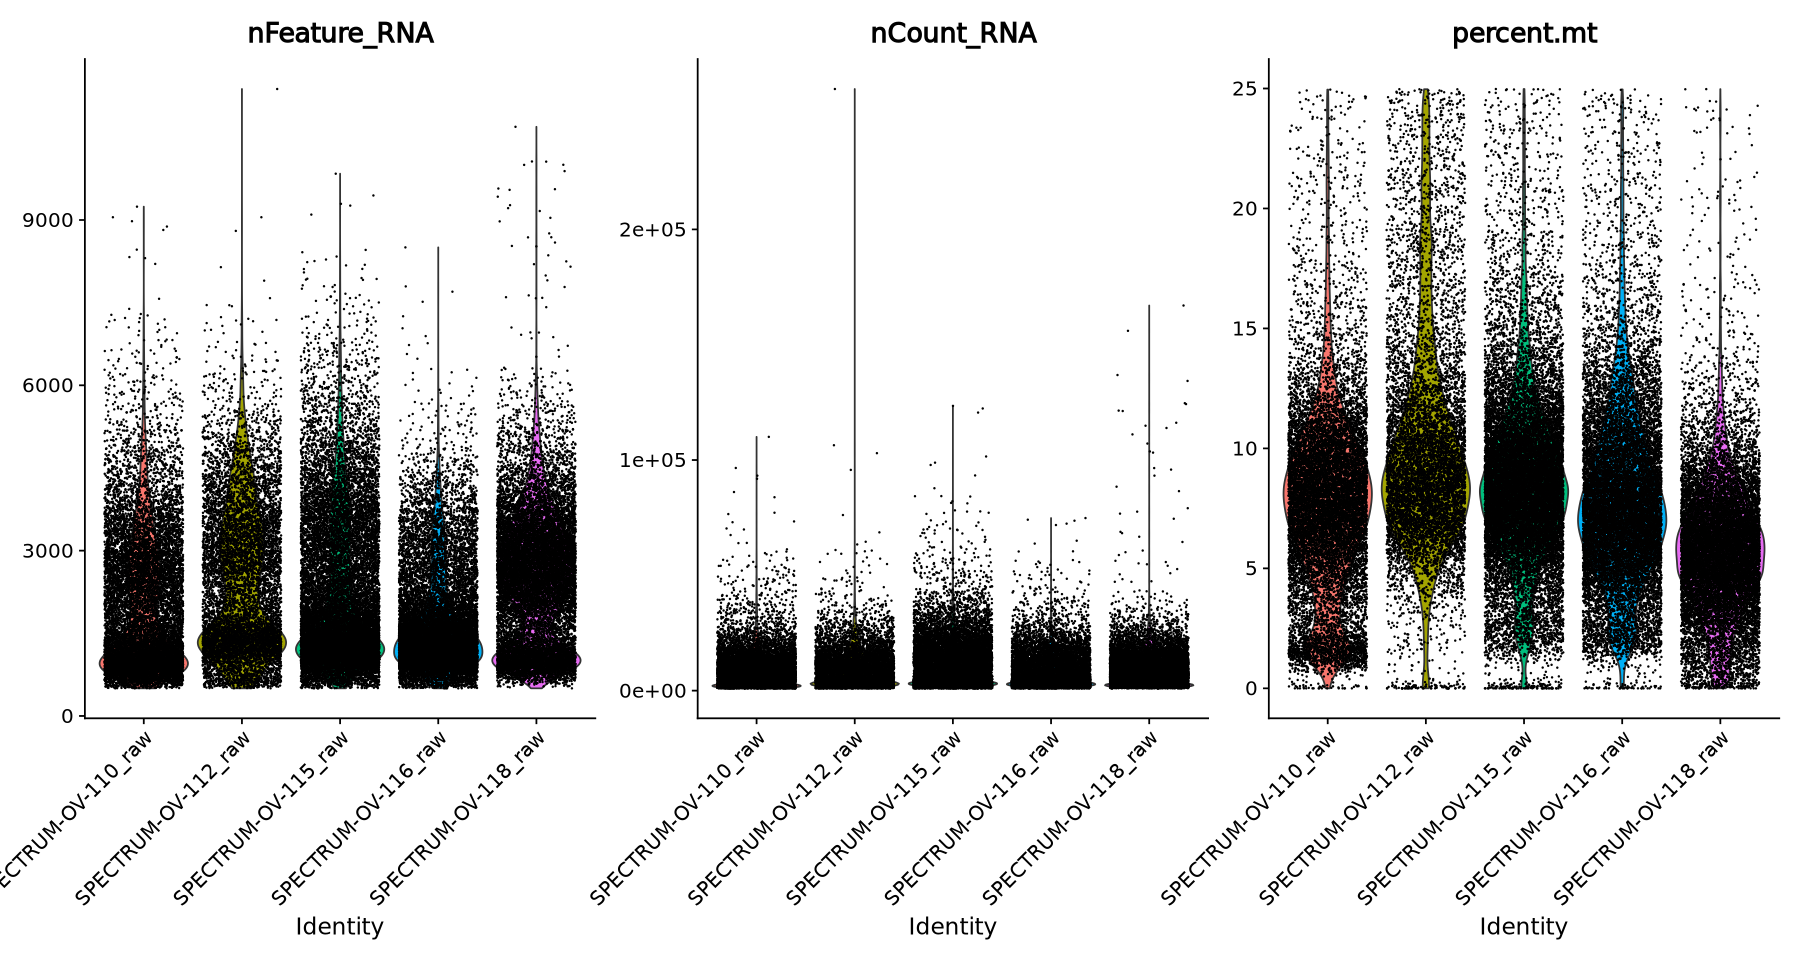

In [58]:
#QC Steps 
OC1.45[["percent.mt"]] <- PercentageFeatureSet(OC1.45, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC1.45, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#QC Steps 
OC2.45[["percent.mt"]] <- PercentageFeatureSet(OC2.45, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC2.45, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#QC Steps 
OC3.45[["percent.mt"]] <- PercentageFeatureSet(OC3.45, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC3.45, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#QC Steps 
OC4.45[["percent.mt"]] <- PercentageFeatureSet(OC4.45, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC4.45, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#QC Steps 
OC5.45[["percent.mt"]] <- PercentageFeatureSet(OC5.45, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC5.45, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [59]:
#Normalise the data
OC1.45 <- NormalizeData(OC1.45)
OC2.45 <- NormalizeData(OC2.45)
OC3.45 <- NormalizeData(OC3.45)
OC4.45 <- NormalizeData(OC4.45)
OC5.45 <- NormalizeData(OC5.45)

In [60]:
#Find variable features
OC1.45 <- FindVariableFeatures(OC1.45, selection.method = "vst", nfeatures = 2000)
OC2.45 <- FindVariableFeatures(OC2.45, selection.method = "vst", nfeatures = 2000)
OC3.45 <- FindVariableFeatures(OC3.45, selection.method = "vst", nfeatures = 2000)
OC4.45 <- FindVariableFeatures(OC4.45, selection.method = "vst", nfeatures = 2000)
OC5.45 <- FindVariableFeatures(OC5.45, selection.method = "vst", nfeatures = 2000)

In [61]:
#Scale the data
OC1.45 <- ScaleData(OC1.45, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [62]:
OC2.45 <- ScaleData(OC2.45, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [63]:
OC3.45 <- ScaleData(OC3.45, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [64]:
OC4.45 <- ScaleData(OC4.45, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [65]:
OC5.45 <- ScaleData(OC5.45, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



note above cell took ~1hr to run when all the samples run in one cell (this was before removing CD45neg)

In [66]:
#due to how long above took to run going to export out RDS now so I can read it in again if below steps crash
saveRDS(OC1.45, file = "/scratch/user/s4436039/scdata/GSE180661/OC1_45ongoing.RDS")
saveRDS(OC2.45, file = "/scratch/user/s4436039/scdata/GSE180661/OC2_45ongoing.RDS")
saveRDS(OC3.45, file = "/scratch/user/s4436039/scdata/GSE180661/OC3_45ongoing.RDS")
saveRDS(OC4.45, file = "/scratch/user/s4436039/scdata/GSE180661/OC4_45ongoing.RDS")
saveRDS(OC5.45, file = "/scratch/user/s4436039/scdata/GSE180661/OC5_45ongoing.RDS")

above takes ~

In [ ]:
#Run PCA
OC1.45 <- RunPCA(OC1.45, features = VariableFeatures(object = OC1.45))

PC_ 1 
Positive:  KRT18, KRT8, KRT19, FXYD3, EPCAM, SMIM22, PERP, CLDN4, MAL2, AGR2 
	   OCIAD2, SPINT2, S100A6, TM4SF1, ELF3, SPINK1, TSPAN8, TACSTD2, GPRC5A, LSR 
	   CLDN7, NQO1, MUC1, TMC5, S100A14, C19orf33, LCN2, ATP1B1, GPX2, ITGA6 
Negative:  VIM, LGALS1, SPARC, COL1A2, IGFBP7, DCN, LUM, SERPINF1, COL1A1, COL3A1 
	   BGN, CALD1, FN1, AEBP1, C1S, NUPR1, MMP2, C1R, COL6A3, CTHRC1 
	   PMP22, TAGLN, SFRP2, MGP, THY1, COL6A2, SERPING1, RAB31, CLEC11A, ID3 
PC_ 2 
Positive:  TYROBP, LAPTM5, FCER1G, AIF1, SRGN, LST1, SPI1, HLA-DPA1, HLA-DRA, MS4A6A 
	   MS4A7, HLA-DQA1, HLA-DPB1, FCGR3A, C1orf162, C1QA, C1QC, HLA-DQB1, OLR1, CD53 
	   HLA-DRB1, C1QB, CYBB, HLA-DMB, ALOX5AP, FCGR2A, CD74, CD68, CD37, CLEC7A 
Negative:  CALD1, BGN, DCN, MYL9, C1S, AEBP1, LUM, COL6A2, COL3A1, C1R 
	   COL1A2, IGFBP7, SPARC, COL1A1, COL6A3, THY1, MXRA8, CNN3, RARRES2, PCOLCE 
	   SFRP2, FSTL1, FBLN1, CCDC80, CTHRC1, TAGLN, COL5A2, ASPN, MGP, THBS2 
PC_ 3 
Positive:  JUN, REG1A, PRSS1, FOS, TFF2, ATF3, CP

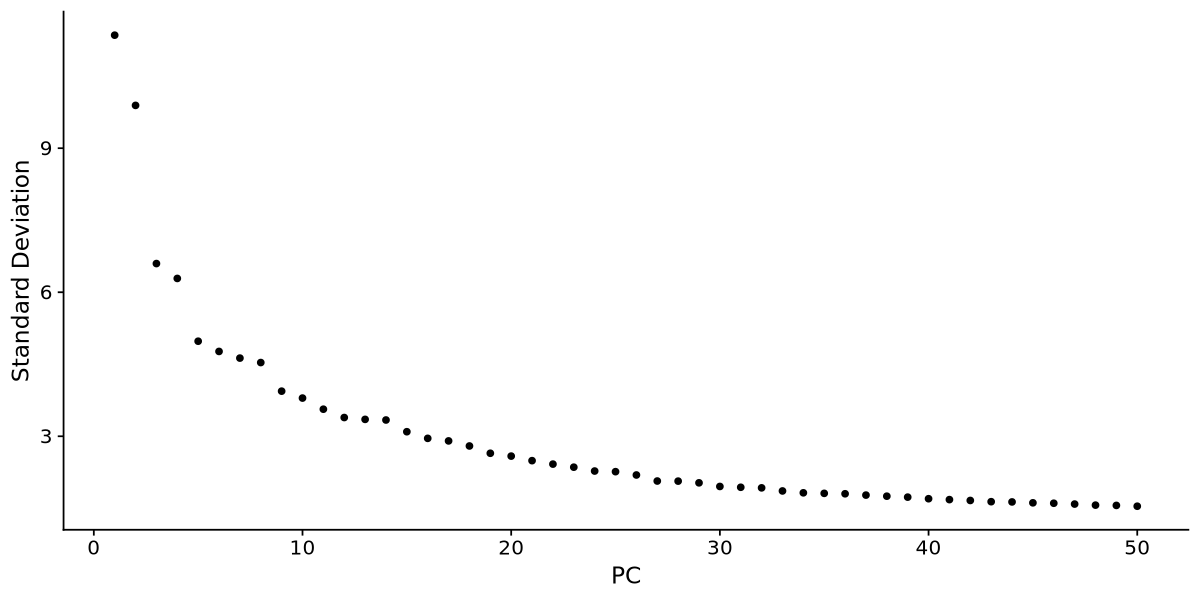

In [ ]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PDAC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [ ]:
#Find neighbours (make sure number matches no. features chosen above)
PDAC <- FindNeighbors(PDAC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [ ]:
#Run UMAP
PDAC <- RunUMAP(PDAC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


13:28:02 UMAP embedding parameters a = 0.9922 b = 1.112

13:28:02 Read 15420 rows and found 40 numeric columns

13:28:02 Using Annoy for neighbor search, n_neighbors = 30

13:28:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:28:03 Writing NN index file to temp file /scratch/temp/9777628/RtmpWcZPlO/file192d1159e335

13:28:03 Searching Annoy index using 1 thread, search_k = 3000

13:28:07 Annoy recall = 100%

13:28:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:28:08 Initializing from normalized Laplacian + noise (using RSpectra)

13:28:09 Commencing optimization for 200 epochs, with 654356 positive edges

13:28:16 Optimization finished



In [ ]:
#Cluster, resolution here set to 0.2
PDAC <- FindClusters(PDAC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15420
Number of edges: 562678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9741
Number of communities: 15
Elapsed time: 1 seconds


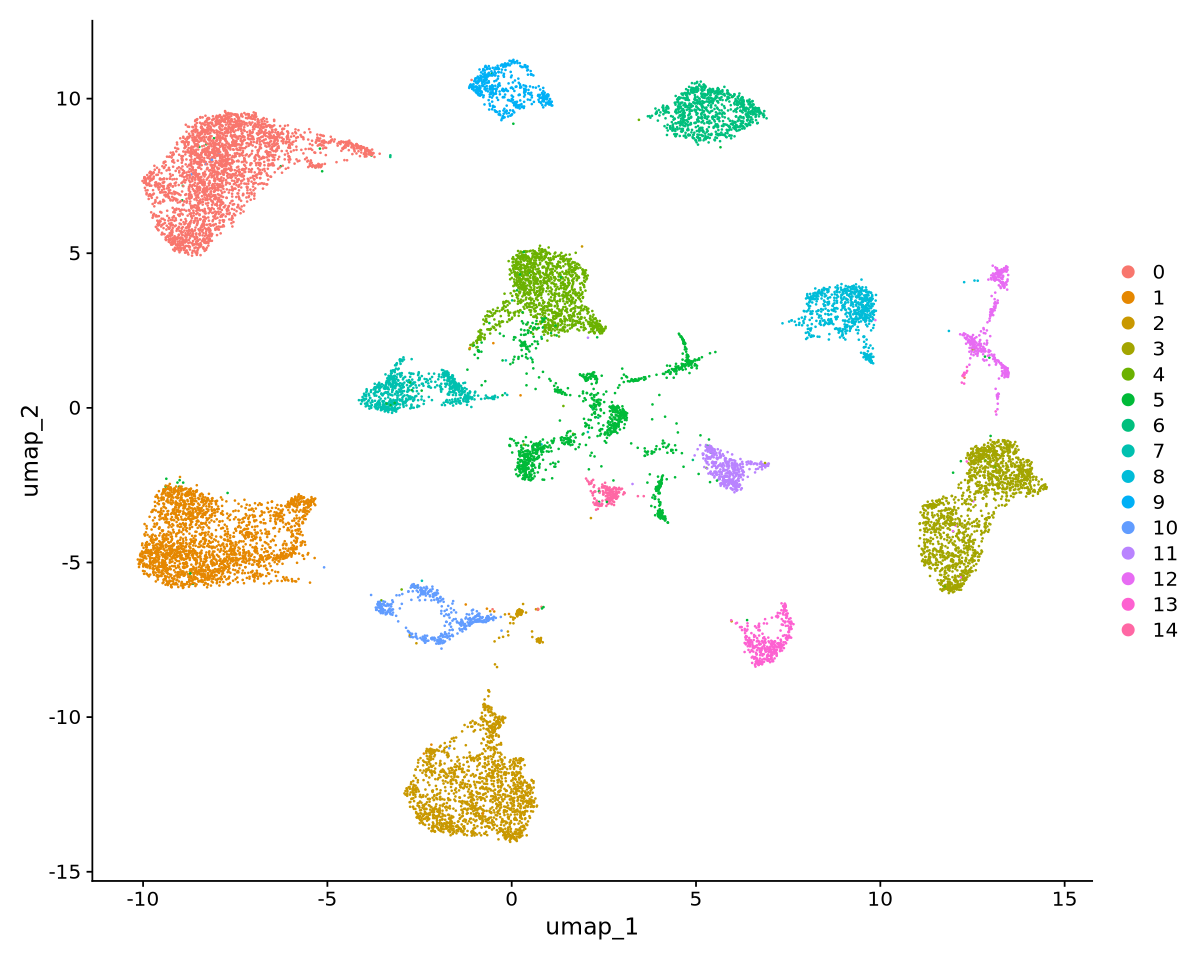

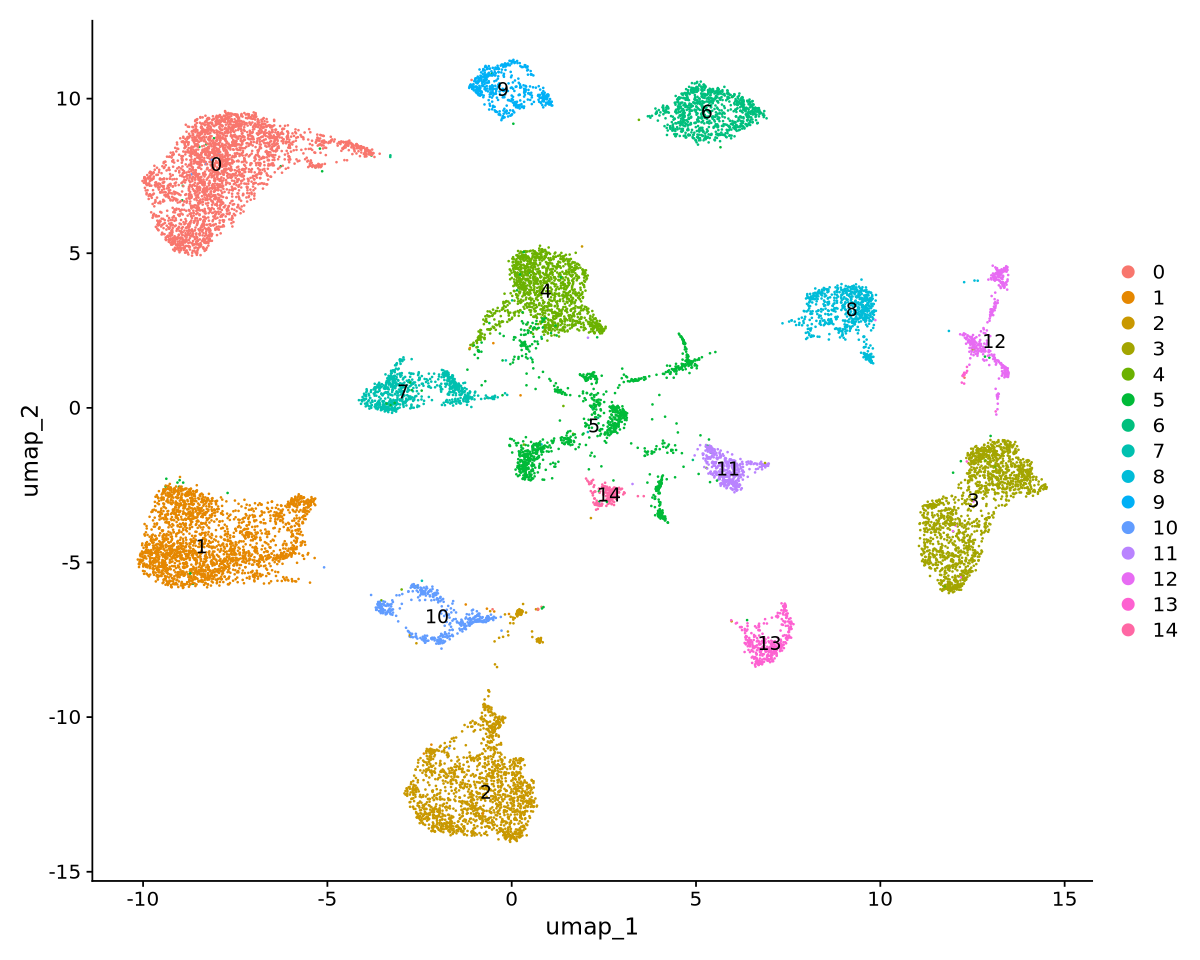

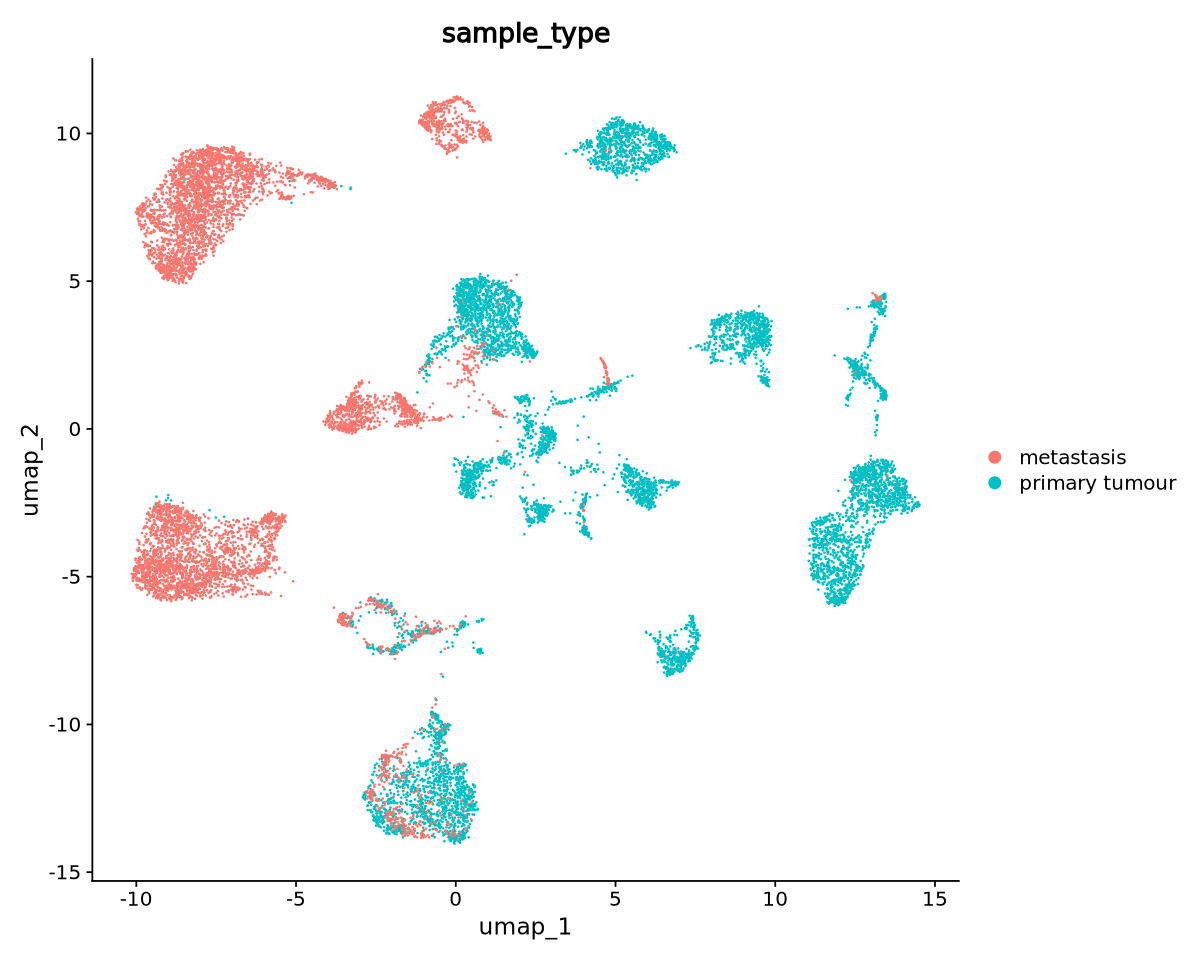

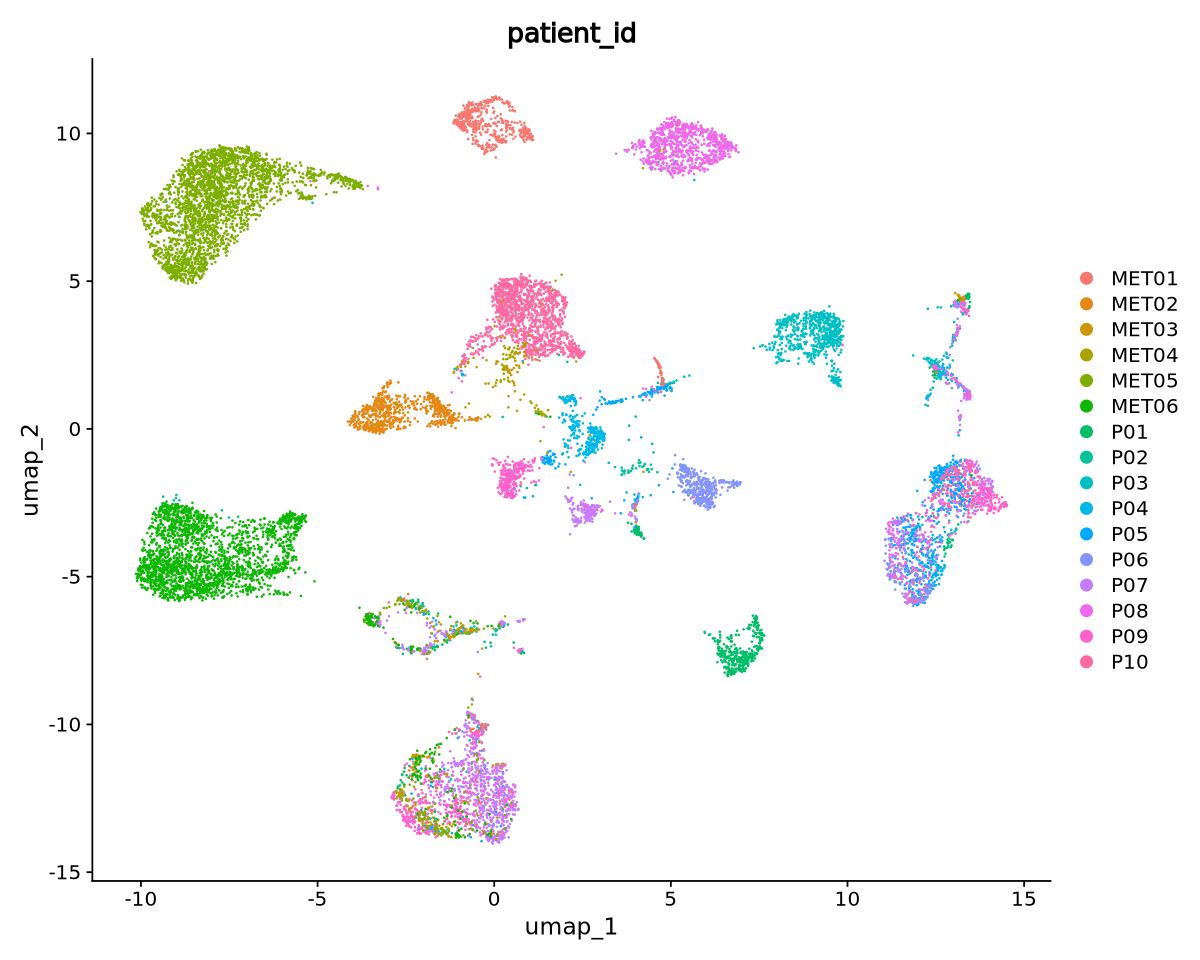

In [ ]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(PDAC, reduction = "umap")
DimPlot(PDAC, reduction = "umap", label=TRUE)
DimPlot(PDAC, reduction = "umap", group = "sample_type")
DimPlot(PDAC, reduction = "umap", group = "patient_id")

In [ ]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PDAC, file = "/scratch/user/s4436039/scdata/GSE154778/GSE154778.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

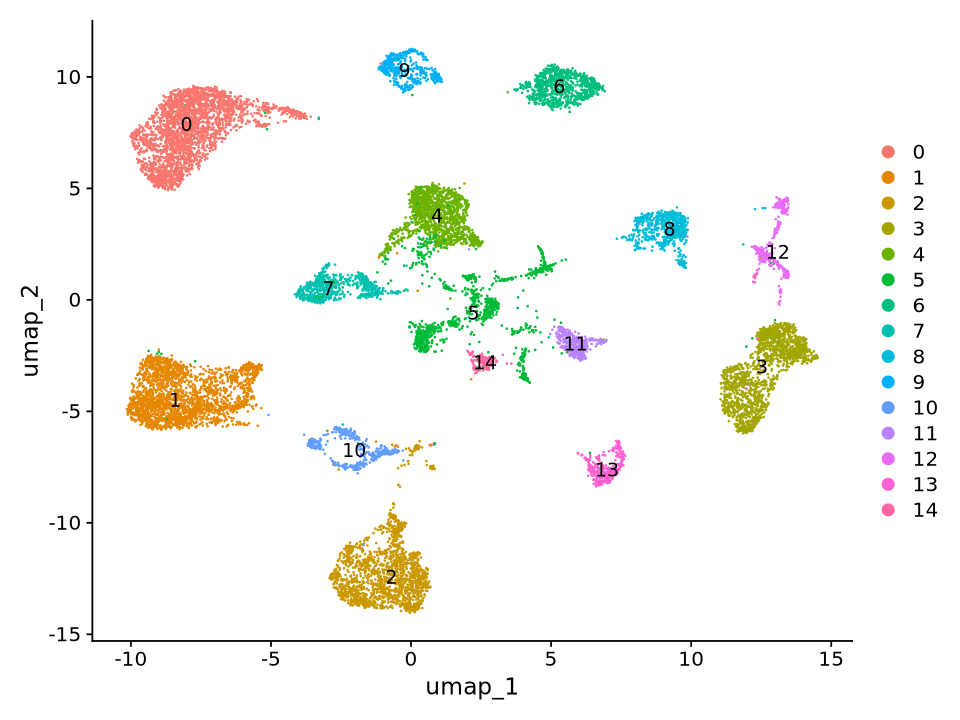

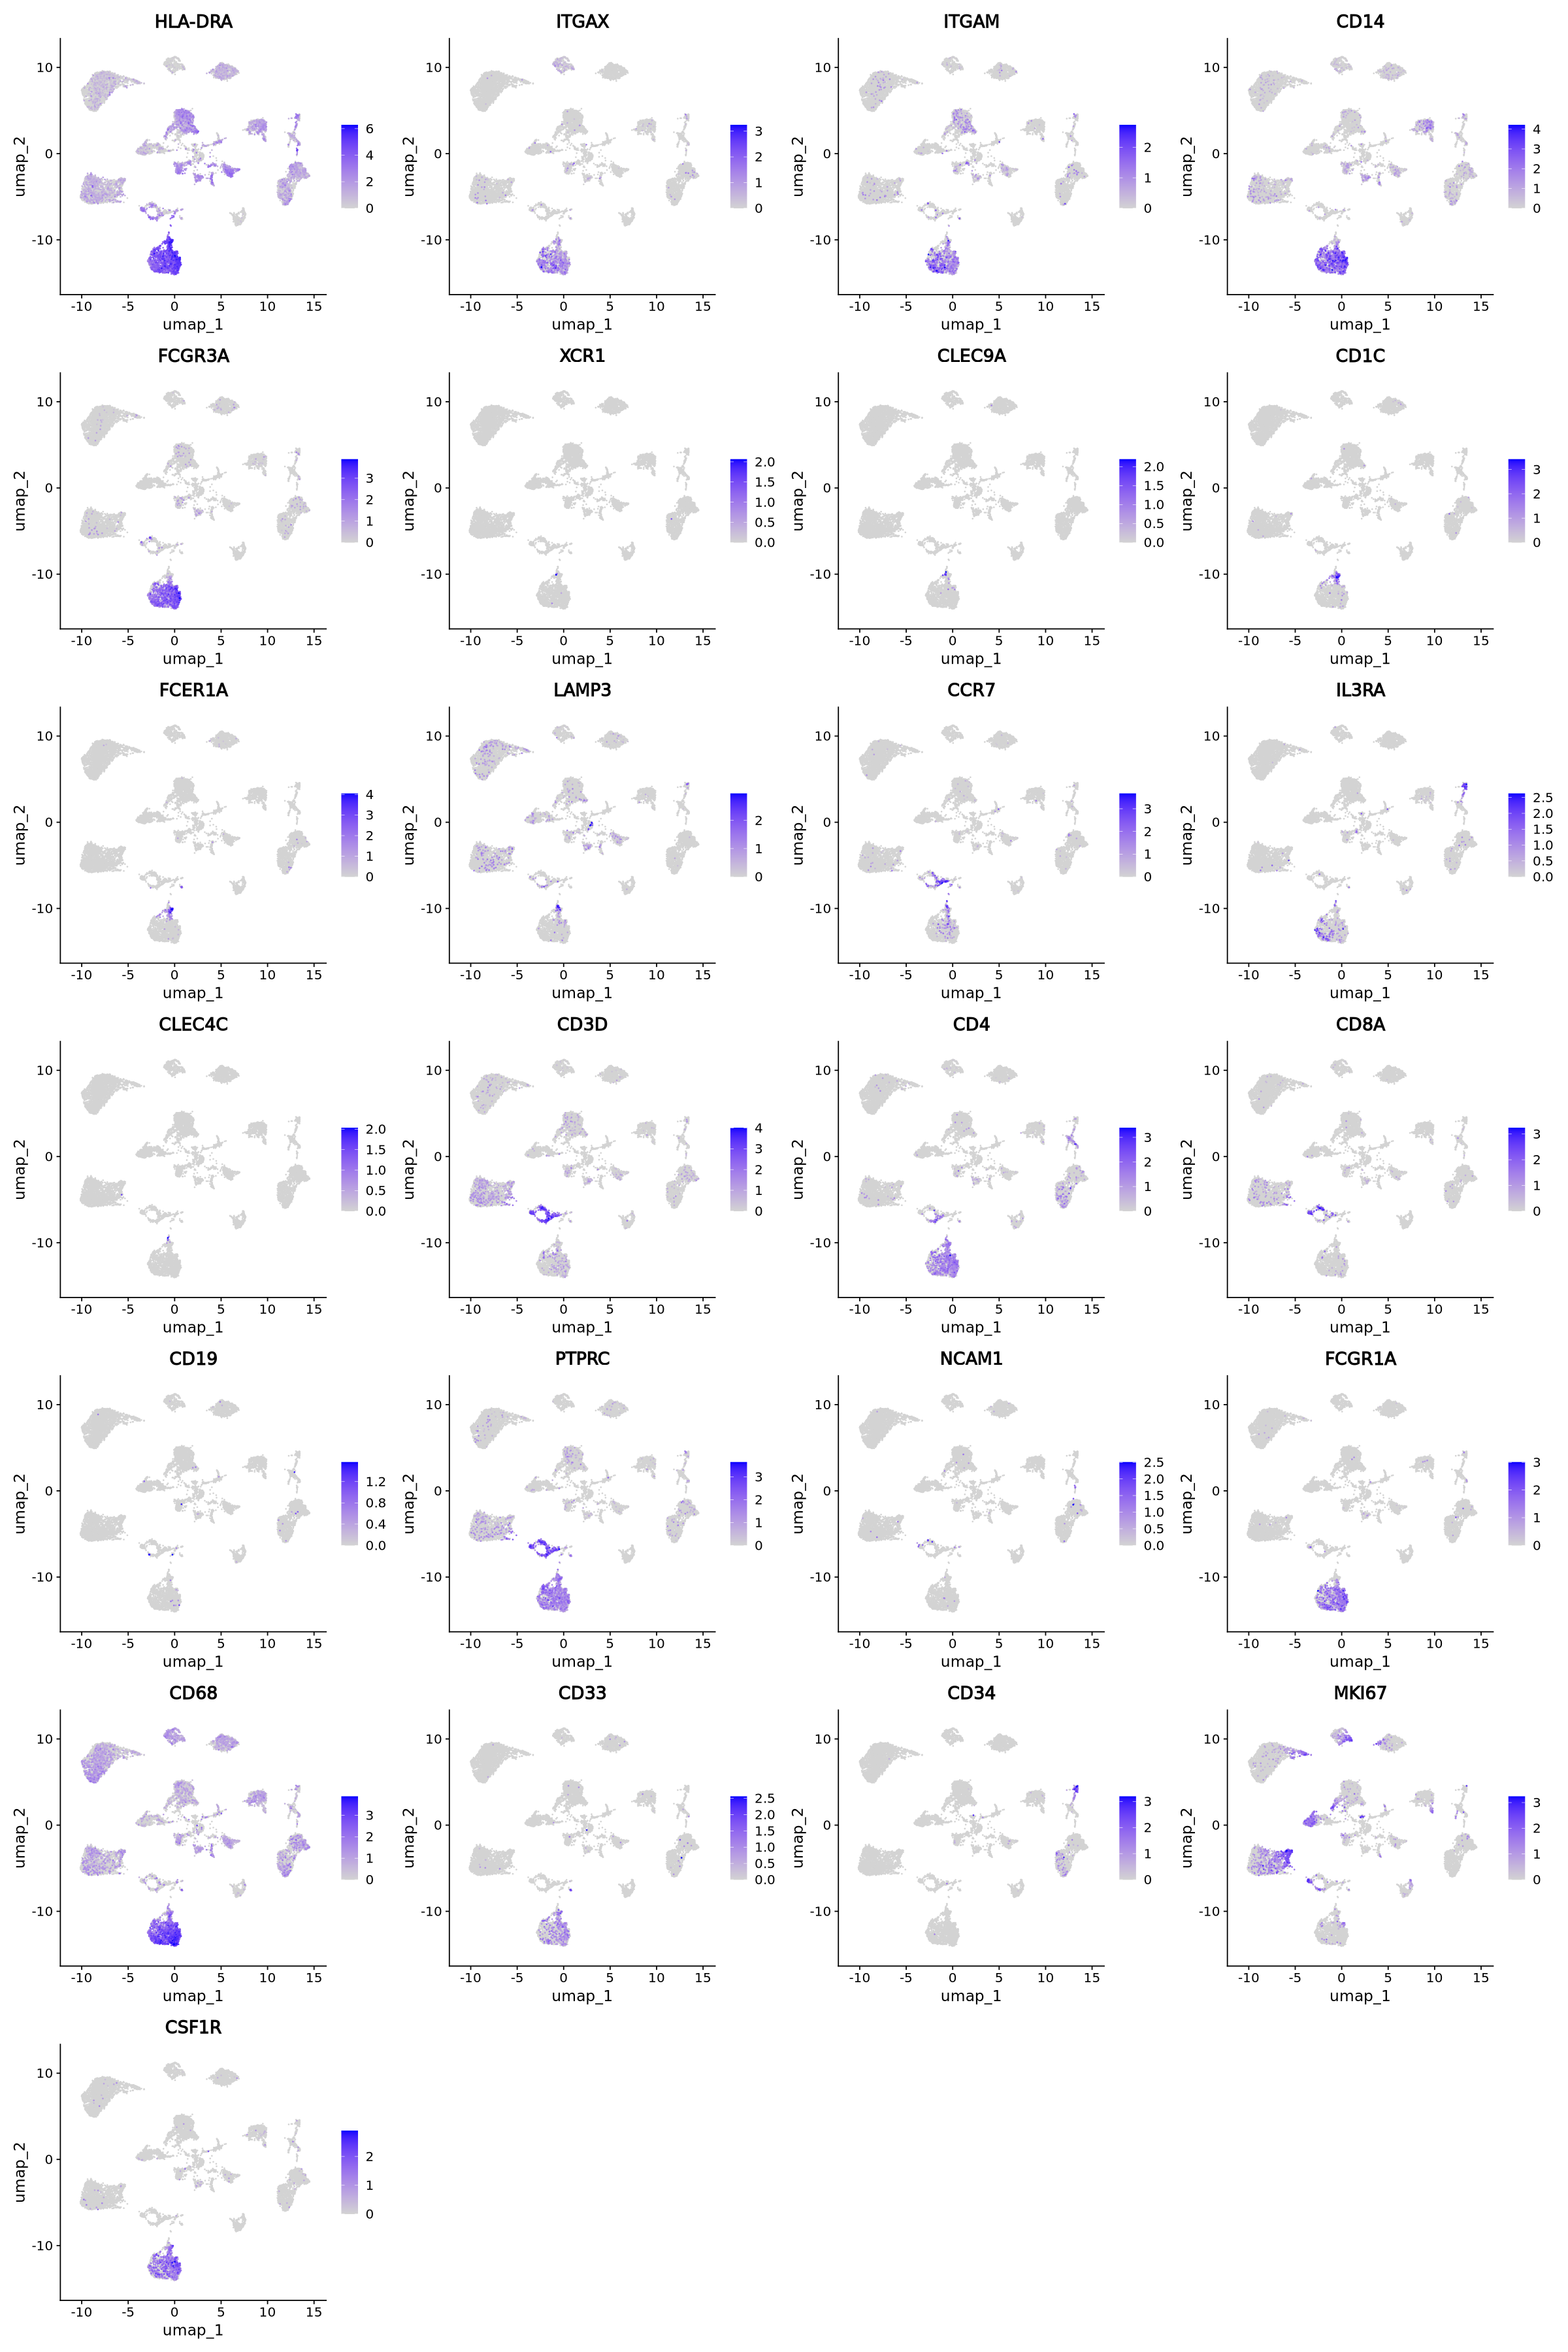

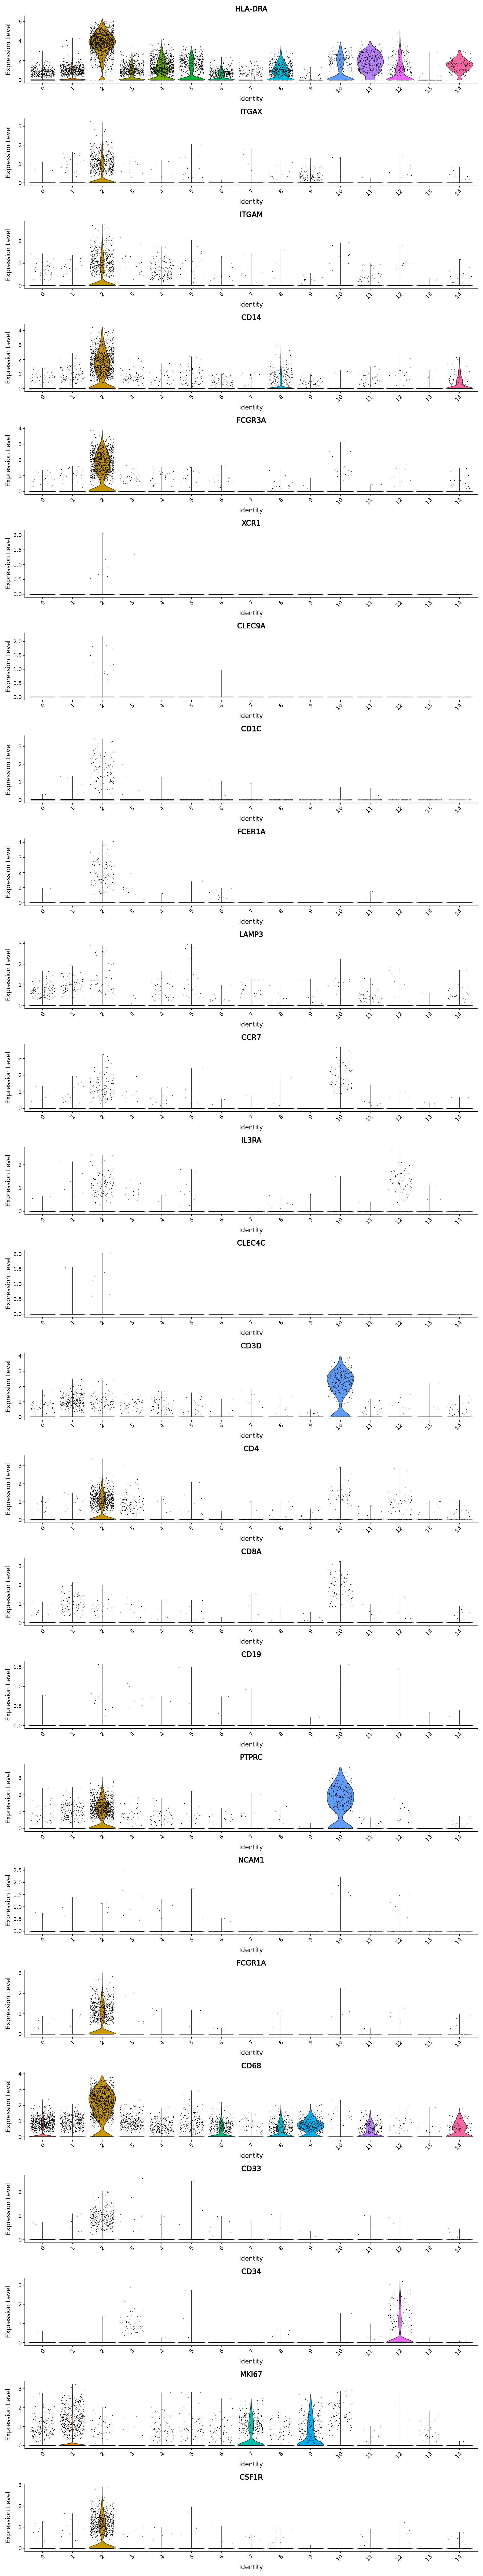

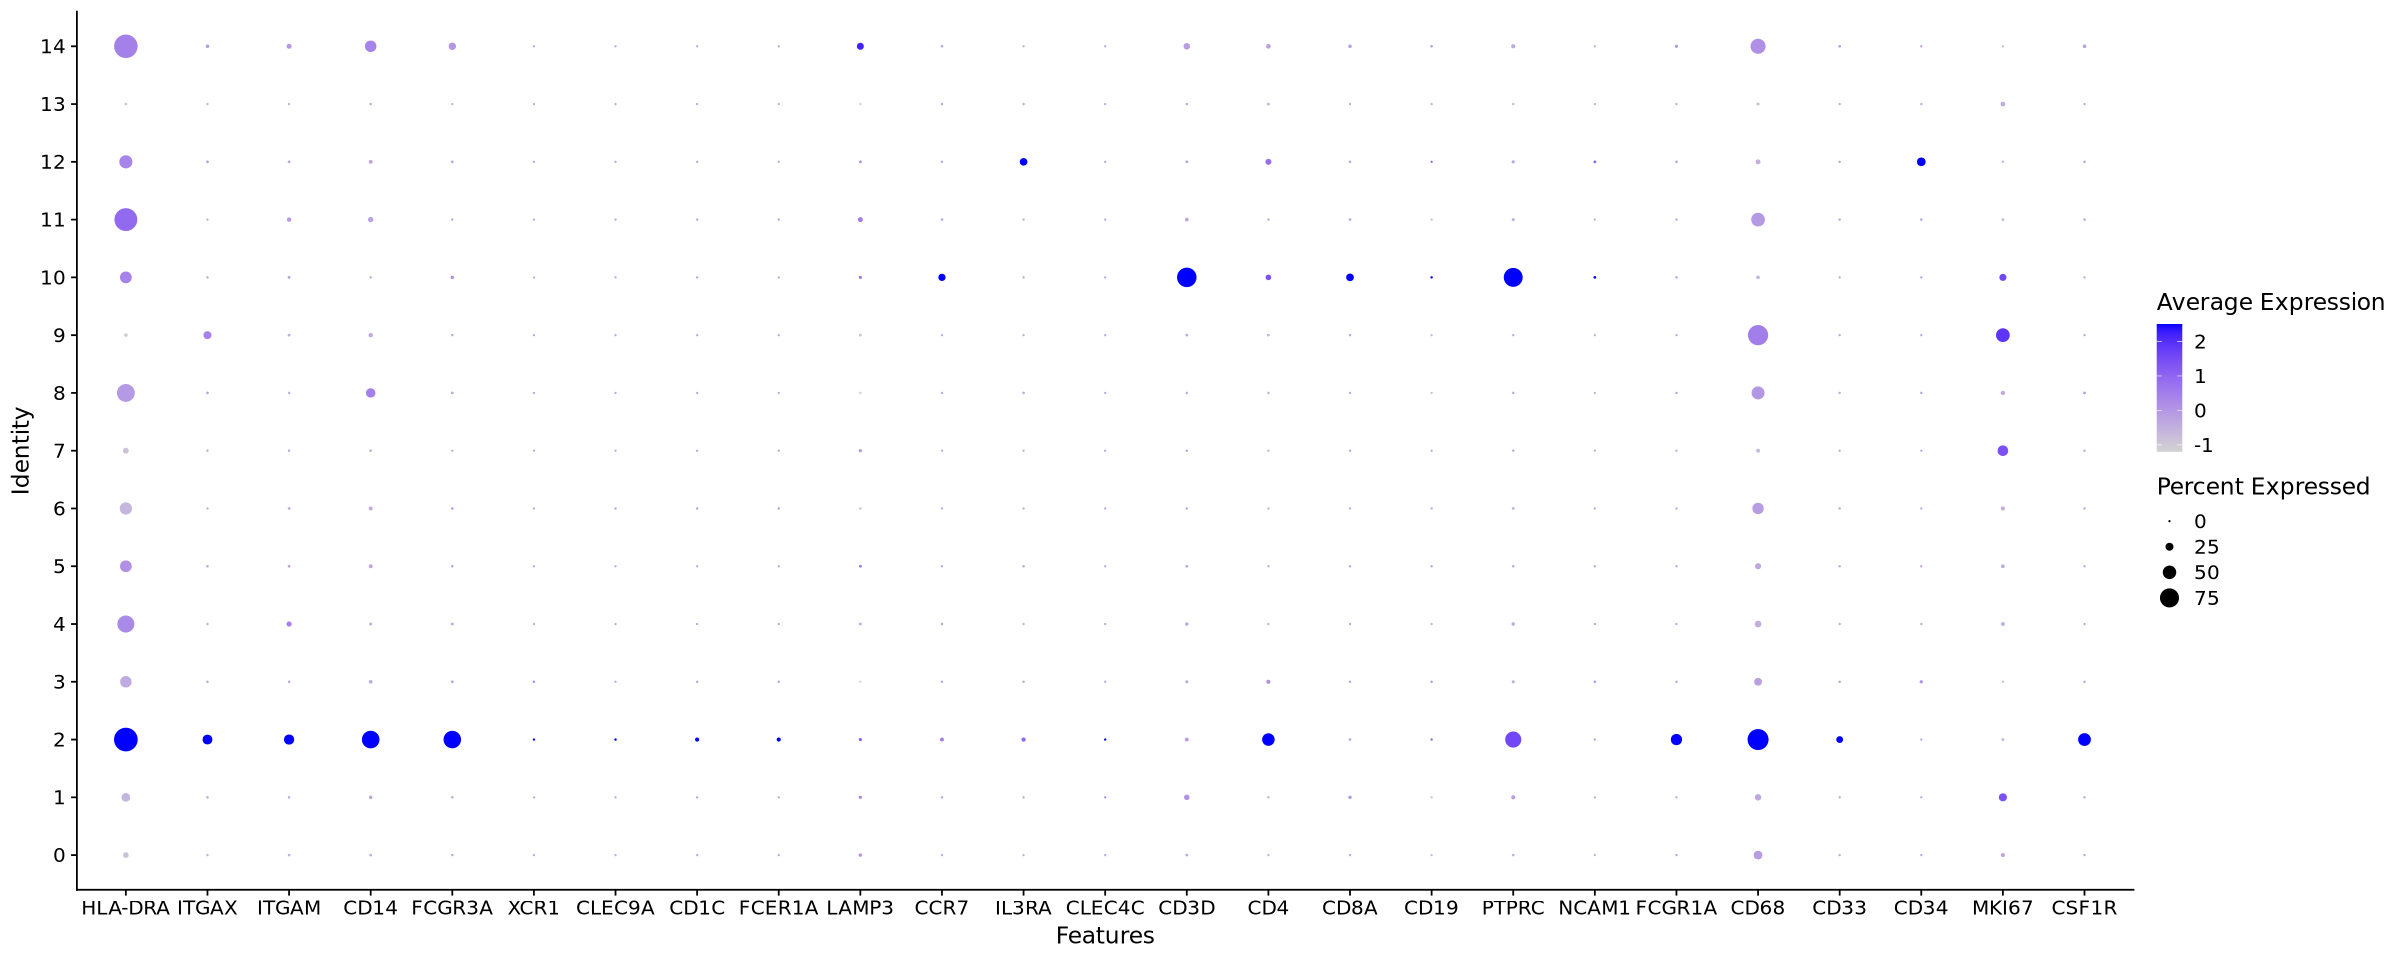

In [ ]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 2 is the myeloid cells, now subsetting out this clusters

In [ ]:
head(PDAC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE154778_PDAC_P01_AAACATACTCGTTT-1 GSE154778   2464       965        
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 GSE154778    689       336        
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 GSE154778   7145      1919        
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 GSE154778   1655       621        
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 GSE154778  14272      2771        
GSE154778_PDAC_P01_AAATACTGTGGATC-1 GSE154778  13832      2541        
                                    sample_type    cancer_type patient_id
GSE154778_PDAC_P01_AAACATACTCGTTT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 primary tumour PDAC        P01       
GSE154778_PDAC_P01_AAATACTGTGGATC-1 primary tumour PDAC        P01       
                                    sample_id                 percent.mt
GSE154778_PDAC_P01_AAACATACTCGTTT-1 GSE154778_PDAC_primary_01 12.6623377
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 GSE154778_PDAC_primary_01  2.1770682
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 GSE154778_PDAC_primary_01  2.4492652
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 GSE154778_PDAC_primary_01  2.1752266
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 GSE154778_PDAC_primary_01  1.5414798
GSE154778_PDAC_P01_AAATACTGTGGATC-1 GSE154778_PDAC_primary_01  0.3181029
                                    RNA_snn_res.0.2 seurat_clusters
GSE154778_PDAC_P01_AAACATACTCGTTT-1 5               5              
GSE154778_PDAC_P01_AAACCGTGGGTAGG-1 3               3              
GSE154778_PDAC_P01_AAAGCAGAACGTTG-1 13              13             
GSE154778_PDAC_P01_AAAGCAGACTGAGT-1 13              13             
GSE154778_PDAC_P01_AAAGGCCTGCTCCT-1 13              13             
GSE154778_PDAC_P01_AAATACTGTGGATC-1 13              13

In [ ]:
myeloid_PDAC <- subset(PDAC, subset = RNA_snn_res.0.2 %in% c("2"))

In [ ]:
PDAC
myeloid_PDAC

An object of class Seurat 
51911 features across 15420 samples within 1 assay 
Active assay: RNA (51911 features, 2000 variable features)
 33 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
51911 features across 1718 samples within 1 assay 
Active assay: RNA (51911 features, 2000 variable features)
 31 layers present: counts.1, counts.2, counts.3, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, data.1, data.2, data.3, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, scale.data
 2 dimensional reductions calculated: pca, umap

In [ ]:
saveRDS(myeloid_PDAC, "/scratch/user/s4436039/scdata/GSE154778/GSE154778_myeloid.RDS")

#### Following the above then need to move entire GSE154778 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE154778/ /QRISdata/Q5935/nikita/scdata/GSE154778

rsync -azvhp /QRISdata/Q5935/nikita/scdata/GSE180661/ /scratch/user/s4436039/scdata/GSE180661
```